In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
disney_data = pd.read_csv(r'D:\MDSA Case Study\disney movie total gross.csv')
disney_data.head()

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,21/12/1937,Musical,G,184925485,5228953251
1,Pinocchio,09/02/1940,Adventure,G,84300000,2188229052
2,Fantasia,13/11/1940,Musical,G,83320000,2187090808
3,Song of the South,12/11/1946,Adventure,G,65000000,1078510579
4,Cinderella,15/02/1950,Drama,G,85000000,920608730


In [6]:
dup_all_mask = disney_data['Movie Title'].duplicated(keep=False)
dups_all = disney_data[dup_all_mask].sort_values('Movie Title')
dups_all

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
8,101 Dalmatians,25/01/1961,Comedy,G,153000000,1362870985
252,101 Dalmatians,27/11/1996,Comedy,G,136189294,258728898
196,Bad Company,20/01/1995,Thriller/Suspense,R,3523909,6829092
364,Bad Company,07/06/2002,Action,PG-13,30157016,43756218
4,Cinderella,15/02/1950,Drama,G,85000000,920608730
556,Cinderella,13/03/2015,Drama,PG,201151353,201151353
19,Freaky Friday,21/01/1977,Comedy,Unknown,25942000,98067733
386,Freaky Friday,06/08/2003,Comedy,PG,110222438,154090360
13,The Jungle Book,18/10/1967,Musical,Not Rated,141843000,789612346
194,The Jungle Book,25/12/1994,Adventure,PG,44342956,88930321


In [7]:
df = disney_data[['Genre', 'MPAA Rating', 'Inflation Adjusted Gross']].copy()
df

,Genre,MPAA Rating,Inflation Adjusted Gross
0,Musical,G,5228953251
1,Adventure,G,2188229052
2,Musical,G,2187090808
3,Adventure,G,1078510579
4,Drama,G,920608730
...,...,...,...
574,Drama,PG-13,12545979
575,Drama,PG,8874389
576,Adventure,PG-13,232532923
577,Adventure,PG,246082029


In [8]:
genre_mpaa_summary = (df.groupby(['Genre', 'MPAA Rating'], as_index=False)
      .agg(
          total_gross=('Inflation Adjusted Gross', 'sum'),
          avg_gross=('Inflation Adjusted Gross', 'mean'),
          movie_count=('Inflation Adjusted Gross', 'count')
      )
      .sort_values('total_gross', ascending=False)
)

In [9]:
genre_mpaa_summary

,Genre,MPAA Rating,total_gross,avg_gross,movie_count
4,Adventure,G,10136004565,2.413334e+08,42
5,Adventure,PG,8625757598,1.513291e+08,57
28,Musical,G,8411443732,9.346049e+08,9
12,Comedy,PG,6857455790,8.905787e+07,77
6,Adventure,PG-13,4550807668,2.676946e+08,17
10,Comedy,G,3696144679,2.174203e+08,17
1,Action,PG-13,3516434321,1.850755e+08,19
20,Drama,G,2365890695,4.731781e+08,5
21,Drama,PG,2148006304,7.671451e+07,28
22,Drama,PG-13,2091952069,5.653925e+07,37


In [10]:
genre_mpaa_summary_asc = (df.groupby(['Genre', 'MPAA Rating'], as_index=False)
      .agg(
          total_gross=('Inflation Adjusted Gross', 'sum'),
          avg_gross=('Inflation Adjusted Gross', 'mean'),
          movie_count=('Inflation Adjusted Gross', 'count')
      )
      .sort_values('total_gross', ascending=True)
)
genre_mpaa_summary_asc

,Genre,MPAA Rating,total_gross,avg_gross,movie_count
18,Documentary,Not Rated,426246,4.262460e+05,1
42,Unknown,PG,5877699,2.938850e+06,2
19,Documentary,PG,8086157,1.617231e+06,5
31,Musical,PG-13,11468231,1.146823e+07,1
44,Unknown,R,14730118,3.682530e+06,4
27,Horror,Unknown,15136765,1.513676e+07,1
46,Western,PG,15983331,1.598333e+07,1
41,Thriller/Suspense,Unknown,26062188,2.606219e+07,1
38,Thriller/Suspense,PG,27569558,2.756956e+07,1
43,Unknown,PG-13,28692474,7.173118e+06,4


In [11]:
min_movies = 5
genre_mpaa_summary_asc = genre_mpaa_summary[genre_mpaa_summary['movie_count'] >= min_movies] \
    .sort_values('total_gross', ascending=False)

genre_mpaa_summary_asc

,Genre,MPAA Rating,total_gross,avg_gross,movie_count
4,Adventure,G,10136004565,2.413334e+08,42
5,Adventure,PG,8625757598,1.513291e+08,57
28,Musical,G,8411443732,9.346049e+08,9
12,Comedy,PG,6857455790,8.905787e+07,77
6,Adventure,PG-13,4550807668,2.676946e+08,17
10,Comedy,G,3696144679,2.174203e+08,17
1,Action,PG-13,3516434321,1.850755e+08,19
20,Drama,G,2365890695,4.731781e+08,5
21,Drama,PG,2148006304,7.671451e+07,28
22,Drama,PG-13,2091952069,5.653925e+07,37


In [12]:
# From the above table, its clear that top Genres are Adventure(G/PG), Musical(G), Comedy(G/PG), Action(PG13) and Drama(G/PG/PG13).
# MPAA ratings that are most common are G, PG and PG-13  

In [13]:
min_movies = 5
genre_mpaa_summary1 = genre_mpaa_summary[genre_mpaa_summary['movie_count'] >= min_movies] \
    .sort_values('total_gross', ascending=True)

genre_mpaa_summary1

,Genre,MPAA Rating,total_gross,avg_gross,movie_count
19,Documentary,PG,8086157,1.617231e+06,5
17,Documentary,G,194976015,1.949760e+07,10
24,Drama,Unknown,228129146,2.073901e+07,11
45,Unknown,Unknown,318303093,4.547187e+07,7
40,Thriller/Suspense,R,341487362,3.794304e+07,9
0,Action,PG,426165810,8.523316e+07,5
34,Romantic Comedy,PG,519609816,7.422997e+07,7
35,Romantic Comedy,PG-13,690588727,5.754906e+07,12
8,Adventure,Unknown,1096836934,1.096837e+08,10
15,Comedy,Unknown,1265203457,6.326017e+07,20


In [24]:
genre_mpaa_summary1["Date Released"] = disney_data["Date Released"]

In [25]:
genre_mpaa_summary1.head()

,Genre,MPAA Rating,total_gross,avg_gross,movie_count,Date Released
19,Documentary,PG,8086157,1.617231e+06,5,21/01/1977
17,Documentary,G,194976015,1.949760e+07,10,07/10/1971
24,Drama,Unknown,228129146,2.073901e+07,11,08/02/1980
45,Unknown,Unknown,318303093,4.547187e+07,7,31/01/1986
40,Thriller/Suspense,R,341487362,3.794304e+07,9,21/06/1985


In [14]:
# From the above table we can see that least successful genres are Documentary(G/PG), Thriller(R), RomCom(PG/PG13)
# But this data is only till 2016 so its not enough to get a clear idea will see what the latest data has to say about it.

<Axes: xlabel='Movie Title'>

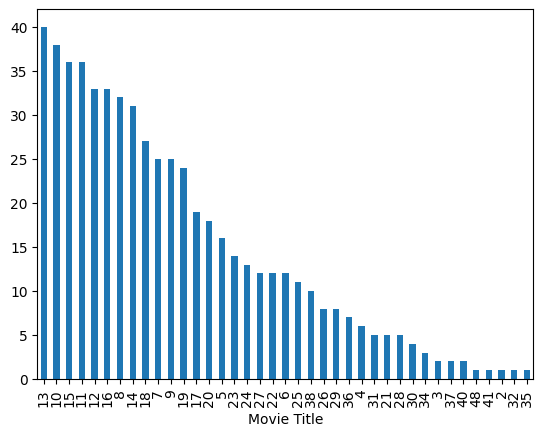

In [ ]:
disney_data["Movie Title"].str.len().value_counts().plot(kind='bar')

In [17]:
df['title_length'] = disney_data["Movie Title"].str.len()

In [19]:
# 5-character buckets: 0-4, 5-9, 10-14, ...
max_len = int(df['title_length'].max())
bins = list(range(0, max_len + 6, 5))

df['title_len_bin'] = pd.cut(df['title_length'], bins=bins, right=False)

bin_summary = (
    df.groupby('title_len_bin', as_index=False)
      .agg(
          avg_gross=('Inflation Adjusted Gross', 'mean'),
          median_gross=('Inflation Adjusted Gross', 'median'),
          movie_count=('Inflation Adjusted Gross', 'count')
      )
)

print(bin_summary)

  title_len_bin     avg_gross  median_gross  movie_count
0        [0, 5)  1.154884e+08    77184895.0            9
1       [5, 10)  1.273685e+08    51107153.0          110
2      [10, 15)  1.091370e+08    50951333.0          178
3      [15, 20)  9.684751e+07    49999822.0          139
4      [20, 25)  9.676824e+07    66794469.0           62
5      [25, 30)  9.802821e+07    55037362.5           44
6      [30, 35)  4.669919e+08    77042381.0           13
7      [35, 40)  2.054991e+08    80914668.0           20
8      [40, 45)  9.850784e+07   129164207.0            3
9      [45, 50)  3.610782e+07    36107823.0            1


C:\Users\Kris\AppData\Local\Temp\ipykernel_30012\3575042761.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('title_len_bin', as_index=False)


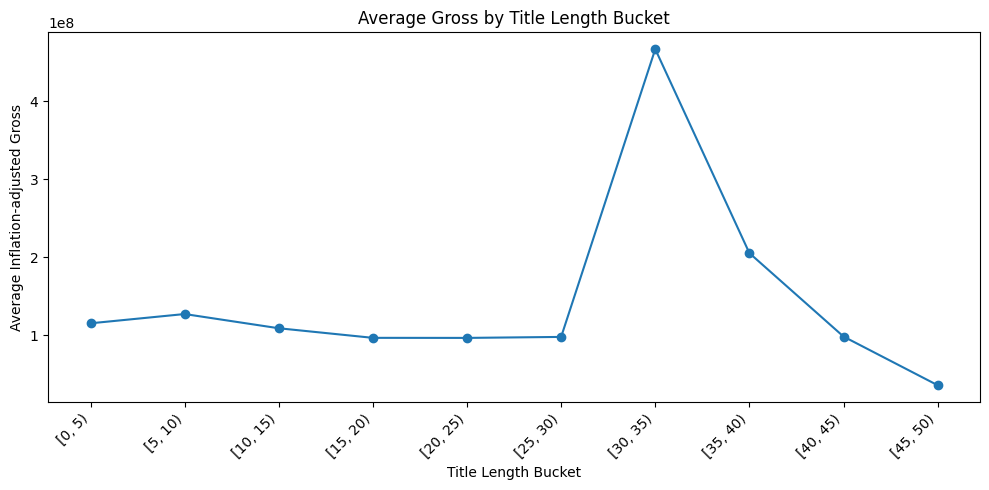

In [20]:
plt.figure(figsize=(10,5))
plt.plot(bin_summary['title_len_bin'].astype(str), bin_summary['avg_gross'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Title Length Bucket')
plt.ylabel('Average Inflation-adjusted Gross')
plt.title('Average Gross by Title Length Bucket')
plt.tight_layout()
plt.show()

In [21]:
pearson_corr = df['title_length'].corr(df['Inflation Adjusted Gross'], method='pearson')
spearman_corr = df['title_length'].corr(df['Inflation Adjusted Gross'], method='spearman')

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: 0.05977562687608895
Spearman correlation: 0.016012590412711435


In [ ]:
# No relationship between title length and gross revenue. Both correlations are close to zero.

In [32]:
all_movie = pd.read_csv(r'D:\MDSA Case Study\Movies Daily Update Dataset export 2026-02-16 00-40-22.csv')

In [33]:
all_movie.head()

,Movie Name,genres,original_language,Unnamed: 3,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,Unnamed: 14,Unnamed: 15
0,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,NaN,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000,558503759,115.0,Released,Rise together or fall alone.,7.246,1878,NaN,NaN
1,Meg 2: The Trench,Action-Science Fiction-Horror,en,NaN,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000,352056482,116.0,Released,Back for seconds.,7.079,1365,NaN,NaN
2,The Pope's Exorcist,Horror-Mystery-Thriller,en,NaN,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000,65675816,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545,NaN,NaN
3,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,NaN,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000,407045464,127.0,Released,Unite or fall.,7.340,1007,NaN,NaN
4,Dune: Part Two,Science Fiction-Adventure,en,NaN,4742.163,Legendary Pictures,2024-02-27,190000000,683813734,167.0,Released,Long live the fighters.,8.300,2770,NaN,NaN


In [35]:
all_movie.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'tagline', 'Unnamed: 3'], inplace=True)

In [36]:
all_movie.head()

,Movie Name,genres,original_language,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000,558503759,115.0,Released,7.246,1878
1,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000,352056482,116.0,Released,7.079,1365
2,The Pope's Exorcist,Horror-Mystery-Thriller,en,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000,65675816,103.0,Released,7.433,545
3,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000,407045464,127.0,Released,7.340,1007
4,Dune: Part Two,Science Fiction-Adventure,en,4742.163,Legendary Pictures,2024-02-27,190000000,683813734,167.0,Released,8.300,2770


In [37]:
# Keep only rows where original_language == 'en'
all_movie = all_movie[all_movie['original_language'] == 'en'].copy()


In [38]:
all_movie.head()

,Movie Name,genres,original_language,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000,558503759,115.0,Released,7.246,1878
1,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000,352056482,116.0,Released,7.079,1365
2,The Pope's Exorcist,Horror-Mystery-Thriller,en,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000,65675816,103.0,Released,7.433,545
3,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000,407045464,127.0,Released,7.340,1007
4,Dune: Part Two,Science Fiction-Adventure,en,4742.163,Legendary Pictures,2024-02-27,190000000,683813734,167.0,Released,8.300,2770


In [39]:
all_movie = all_movie[all_movie['release_date'] >= '1937-01-01'].copy()

In [40]:
all_movie.head()

,Movie Name,genres,original_language,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000,558503759,115.0,Released,7.246,1878
1,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000,352056482,116.0,Released,7.079,1365
2,The Pope's Exorcist,Horror-Mystery-Thriller,en,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000,65675816,103.0,Released,7.433,545
3,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000,407045464,127.0,Released,7.340,1007
4,Dune: Part Two,Science Fiction-Adventure,en,4742.163,Legendary Pictures,2024-02-27,190000000,683813734,167.0,Released,8.300,2770


In [42]:
all_movie = all_movie[all_movie['revenue'] >= 10000].copy()
all_movie.head()

,Movie Name,genres,original_language,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000,558503759,115.0,Released,7.246,1878
1,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000,352056482,116.0,Released,7.079,1365
2,The Pope's Exorcist,Horror-Mystery-Thriller,en,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000,65675816,103.0,Released,7.433,545
3,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000,407045464,127.0,Released,7.340,1007
4,Dune: Part Two,Science Fiction-Adventure,en,4742.163,Legendary Pictures,2024-02-27,190000000,683813734,167.0,Released,8.300,2770


In [52]:
to_add = all_movie[
    (all_movie['production_companies'].str.contains(r'Disney', case=False, na=False, regex=True)) &
    (pd.to_datetime(all_movie['release_date'], errors='coerce') >= pd.Timestamp('2017-01-01'))
].copy()

In [53]:
to_add.head()

,Movie Name,genres,original_language,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count
132,Strange World,Animation-Family-Adventure-Science Fiction,en,318.312,Walt Disney Pictures-Walt Disney Animation Stu...,2022-11-23,180000000,73621640,102.0,Released,6.513,831
160,Encanto,Animation-Comedy-Family-Fantasy,en,281.488,Walt Disney Pictures-Walt Disney Animation Stu...,2021-10-13,50000000,253000000,102.0,Released,7.654,7969
312,Turning Red,Animation-Family-Comedy-Fantasy,en,167.028,Walt Disney Pictures-Pixar,2022-03-10,175000000,21328962,100.0,Released,7.400,4887
372,Coco,Family-Animation-Fantasy-Music-Comedy-Adventure,en,144.713,Pixar-Walt Disney Pictures,2017-10-27,175000000,800526015,105.0,Released,8.200,17074
417,Luca,Animation-Comedy-Family-Fantasy-Action-Adventure,en,132.456,Pixar-Walt Disney Pictures,2021-06-17,200000000,49750471,95.0,Released,7.900,7127


In [54]:
to_add.drop(columns=['original_language', 'popularity', 'status', 'vote_average', 'vote_count', 'budget', 'runtime'], inplace=True)

In [55]:
to_add.rename(columns={
    'Movie Name': 'Movie Title',
    'Release Date': 'Date Released',
    'genres': 'Genre',
}, inplace=True)

In [56]:
to_add.head()

,Movie Title,Genre,production_companies,release_date,revenue
132,Strange World,Animation-Family-Adventure-Science Fiction,Walt Disney Pictures-Walt Disney Animation Stu...,2022-11-23,73621640
160,Encanto,Animation-Comedy-Family-Fantasy,Walt Disney Pictures-Walt Disney Animation Stu...,2021-10-13,253000000
312,Turning Red,Animation-Family-Comedy-Fantasy,Walt Disney Pictures-Pixar,2022-03-10,21328962
372,Coco,Family-Animation-Fantasy-Music-Comedy-Adventure,Pixar-Walt Disney Pictures,2017-10-27,800526015
417,Luca,Animation-Comedy-Family-Fantasy-Action-Adventure,Pixar-Walt Disney Pictures,2021-06-17,49750471


In [57]:
to_add.drop(columns=['production_companies'], inplace=True)

In [60]:
to_add.rename(columns={
    'revenue': 'Inflation Adjusted Gross'}, inplace=True)

In [61]:
to_add.head()

,Movie Title,Genre,Date Released,Inflation Adjusted Gross
132,Strange World,Animation-Family-Adventure-Science Fiction,2022-11-23,73621640
160,Encanto,Animation-Comedy-Family-Fantasy,2021-10-13,253000000
312,Turning Red,Animation-Family-Comedy-Fantasy,2022-03-10,21328962
372,Coco,Family-Animation-Fantasy-Music-Comedy-Adventure,2017-10-27,800526015
417,Luca,Animation-Comedy-Family-Fantasy-Action-Adventure,2021-06-17,49750471


In [85]:
combined = pd.concat([disney_data, to_add], ignore_index=True)

In [86]:
combined.head()

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,21/12/1937,Musical,G,184925485.0,5228953251
1,Pinocchio,09/02/1940,Adventure,G,84300000.0,2188229052
2,Fantasia,13/11/1940,Musical,G,83320000.0,2187090808
3,Song of the South,12/11/1946,Adventure,G,65000000.0,1078510579
4,Cinderella,15/02/1950,Drama,G,85000000.0,920608730


In [87]:
combined.drop(columns=['Total Gross'], inplace=True)

In [88]:
combined.head()

,Movie Title,Date Released,Genre,MPAA Rating,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,21/12/1937,Musical,G,5228953251
1,Pinocchio,09/02/1940,Adventure,G,2188229052
2,Fantasia,13/11/1940,Musical,G,2187090808
3,Song of the South,12/11/1946,Adventure,G,1078510579
4,Cinderella,15/02/1950,Drama,G,920608730


In [69]:
disney_data["Genre"].value_counts()

Genre
Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Unknown                 17
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: count, dtype: int64

In [70]:
combined['Genre'] = combined['Genre'].str.split('-').str[0].str.strip()

In [71]:
combined.head()

,Movie Title,Date Released,Genre,MPAA Rating,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,21/12/1937,Musical,G,5228953251
1,Pinocchio,09/02/1940,Adventure,G,2188229052
2,Fantasia,13/11/1940,Musical,G,2187090808
3,Song of the South,12/11/1946,Adventure,G,1078510579
4,Cinderella,15/02/1950,Drama,G,920608730


In [76]:
import re

In [89]:
allowed = {
    "Comedy","Adventure","Drama","Action","Thriller/Suspense","Romantic Comedy",
    "Unknown","Musical","Documentary","Western","Horror","Black Comedy","Concert/Performance"
}

def first_allowed_genre(s):
    if pd.isna(s):
        return "Unknown"
    parts = [p.strip() for p in re.split(r'[-/,|]', str(s))]
    for p in parts:
        if p in allowed:
            return p
    return "Unknown"

combined['Genre'] = combined['Genre'].apply(first_allowed_genre)

In [90]:
combined.tail()

,Movie Title,Date Released,Genre,MPAA Rating,Inflation Adjusted Gross
602,Solo: A Star Wars Story,2018-05-15,Adventure,NaN,392952373
603,Dumbo,2019-03-27,Adventure,NaN,353284621
604,Mary Poppins Returns,2018-12-13,Comedy,NaN,348807090
605,Christopher Robin,2018-08-02,Adventure,NaN,99138899
606,A Wrinkle in Time,2018-03-08,Adventure,NaN,132675864


In [91]:
combined.loc[
    combined['Movie Title'].str.contains(r'beauty\s+and\s+the\s+beast', case=False, na=False),
    'Genre'
] = 'Musical'

In [92]:
combined

,Movie Title,Date Released,Genre,MPAA Rating,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,21/12/1937,Musical,G,5228953251
1,Pinocchio,09/02/1940,Adventure,G,2188229052
2,Fantasia,13/11/1940,Musical,G,2187090808
3,Song of the South,12/11/1946,Adventure,G,1078510579
4,Cinderella,15/02/1950,Drama,G,920608730
...,...,...,...,...,...
602,Solo: A Star Wars Story,2018-05-15,Adventure,NaN,392952373
603,Dumbo,2019-03-27,Adventure,NaN,353284621
604,Mary Poppins Returns,2018-12-13,Comedy,NaN,348807090
605,Christopher Robin,2018-08-02,Adventure,NaN,99138899


In [94]:
date_col = 'Date Released'

# String version for pattern checks
s = combined[date_col].astype(str).str.strip()

# Only pre-2017-style rows (DD/MM/YYYY) -> parse and reformat
mask_pre = s.str.contains('/', na=False)

combined.loc[mask_pre, date_col] = pd.to_datetime(
    combined.loc[mask_pre, date_col],
    format='%d/%m/%Y',
    errors='coerce'
).dt.strftime('%Y-%m-%d')

In [95]:
combined.head()

,Movie Title,Date Released,Genre,MPAA Rating,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,5228953251
1,Pinocchio,1940-02-09,Adventure,G,2188229052
2,Fantasia,1940-11-13,Musical,G,2187090808
3,Song of the South,1946-11-12,Adventure,G,1078510579
4,Cinderella,1950-02-15,Drama,G,920608730


In [96]:
combined[combined['MPAA Rating'].isna()]

,Movie Title,Date Released,Genre,MPAA Rating,Inflation Adjusted Gross
579,Strange World,2022-11-23,Adventure,NaN,73621640
580,Encanto,2021-10-13,Comedy,NaN,253000000
581,Turning Red,2022-03-10,Comedy,NaN,21328962
582,Coco,2017-10-27,Comedy,NaN,800526015
583,Luca,2021-06-17,Comedy,NaN,49750471
584,The Lion King,2019-07-12,Adventure,NaN,1663075401
585,Cruella,2021-05-26,Comedy,NaN,233503234
586,Raya and the Last Dragon,2021-03-03,Action,NaN,130423032
587,Toy Story 4,2019-06-19,Adventure,NaN,1073395000
588,Maleficent: Mistress of Evil,2019-10-16,Adventure,NaN,491730089


In [97]:
mpaa_map = {
    "Haunted Mansion": "PG-13",
    "Strange World": "PG",
    "Lightyear": "PG",
    "Turning Red": "PG",
    "Encanto": "PG",
    "Jungle Cruise": "PG-13",
    "Luca": "PG",
    "Cruella": "PG-13",
    "Raya and the Last Dragon": "PG",
    "Soul": "PG",
    "Mulan": "PG-13",
    "Onward": "PG",
    "Frozen II": "PG",
    "Maleficent: Mistress of Evil": "PG",
    "The Lion King": "PG",
    "Toy Story 4": "G",
    "Aladdin": "PG",
    "Dumbo": "PG",
    "Mary Poppins Returns": "PG",
    "Ralph Breaks the Internet": "PG",
    "The Nutcracker and the Four Realms": "PG",
    "Christopher Robin": "PG",
    "Incredibles 2": "PG",
    "Solo: A Star Wars Story": "PG-13",
    "A Wrinkle in Time": "PG",
    "Coco": "PG",
    "Pirates of the Caribbean: Dead Men Tell No Tales": "PG-13",
    "Beauty and the Beast": "PG"
}

# Fill only missing MPAA Rating values based on Movie Title
missing_mask = combined["MPAA Rating"].isna() | (combined["MPAA Rating"].astype(str).str.strip() == "")
combined.loc[missing_mask, "MPAA Rating"] = combined.loc[missing_mask, "Movie Title"].map(mpaa_map)

In [98]:
combined[combined['MPAA Rating']=="Unknown"]

,Movie Title,Date Released,Genre,MPAA Rating,Inflation Adjusted Gross
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,Unknown,528279994
7,Sleeping Beauty,1959-01-29,Drama,Unknown,21505832
9,The Absent Minded Professor,1961-03-16,Comedy,Unknown,310094574
12,The Sword in the Stone,1963-12-25,Adventure,Unknown,153870834
14,Blackbeard's Ghost,1968-02-08,Comedy,Unknown,138612686
16,The Boatniks,1970-07-01,Comedy,Unknown,101200742
17,Bedknobs and Broomsticks,1971-10-07,Musical,Unknown,91305448
18,The Apple Dumpling Gang,1975-07-01,Comedy,Unknown,131246872
19,Freaky Friday,1977-01-21,Comedy,Unknown,98067733
20,The Many Adventures of Winnie the Pooh,1977-03-11,Unknown,Unknown,0


In [101]:
wb_data = all_movie[
    (all_movie['production_companies'].str.contains(r'Warner', case=False, na=False, regex=True)) &
    (pd.to_datetime(all_movie['release_date'], errors='coerce') >= pd.Timestamp('1937-01-01'))
].copy()

In [102]:
wb_data.head()

,Movie Name,genres,original_language,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count
0,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,en,10484.676,Legendary Pictures-Warner Bros. Pictures,2024-03-27,150000000,558503759,115.0,Released,7.246,1878
1,Meg 2: The Trench,Action-Science Fiction-Horror,en,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000,352056482,116.0,Released,7.079,1365
13,Aquaman and the Lost Kingdom,Action-Adventure-Fantasy,en,2141.691,Warner Bros. Pictures-The Safran Company-Atomi...,2023-12-20,205000000,397860076,124.0,Released,6.786,756
17,Furiosa: A Mad Max Saga,Action-Adventure-Science Fiction,en,1872.179,Warner Bros. Pictures-Kennedy Miller Mitchell-...,2024-05-22,170000000,172775791,149.0,Released,7.652,2229
67,Twisters,Action-Adventure-Drama,en,523.435,Universal Pictures-Warner Bros. Pictures-Ambli...,2024-07-10,155000000,274535650,123.0,Released,7.145,320


In [103]:
wb_data.drop(columns=['original_language', 'popularity', 'status', 'vote_average', 'vote_count', 'budget', 'runtime'], inplace=True)

In [104]:
wb_data.rename(columns={
    'Movie Name': 'Movie Title',
    'Release Date': 'Date Released',
    'genres': 'Genre',
    'revenue': 'Inflation Adjusted Gross',
}, inplace=True)

In [105]:
wb_data.head()

,Movie Title,Genre,production_companies,release_date,Inflation Adjusted Gross
0,Godzilla x Kong: The New Empire,Science Fiction-Action-Adventure,Legendary Pictures-Warner Bros. Pictures,2024-03-27,558503759
1,Meg 2: The Trench,Action-Science Fiction-Horror,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,352056482
13,Aquaman and the Lost Kingdom,Action-Adventure-Fantasy,Warner Bros. Pictures-The Safran Company-Atomi...,2023-12-20,397860076
17,Furiosa: A Mad Max Saga,Action-Adventure-Science Fiction,Warner Bros. Pictures-Kennedy Miller Mitchell-...,2024-05-22,172775791
67,Twisters,Action-Adventure-Drama,Universal Pictures-Warner Bros. Pictures-Ambli...,2024-07-10,274535650
